In [1]:
import numpy as np

In [2]:
# data = []
# for i in range(100):
#     x = np.random.uniform(3., 12.)
#     # mean=0, std=0.1
#     eps = np.random.normal(0., 0.1)
#     y = 1.477 * x + 0.089 + eps
#     data.append([x, y])
# data = np.array(data)
# print(data.shape, data)

In [3]:
# y = wx + b
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # computer mean-squared-error
        totalError += (y - (w * x + b)) ** 2
    # average loss for each point
    return totalError / float(len(points))

In [4]:
def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # grad_b = 2(wx+b-y)
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        # grad_w = 2(wx+b-y)*x
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
    # update w'
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

In [5]:
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]

In [6]:
def run():
    points = np.genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w,
                  compute_error_for_line_given_points(initial_b, initial_w, points))
          )
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, w = {2}, error = {3}".
          format(num_iterations, b, w,
                 compute_error_for_line_given_points(b, w, points)))
    return b,w

In [7]:
if __name__ == '__main__':
    b,w = run()

Starting gradient descent at b = 0, w = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, w = 1.4777440851894448, error = 112.61481011613473


In [9]:
points = np.genfromtxt("data.csv", delimiter=",")

In [10]:
import tensorflow as tf

In [13]:
points[:,0].shape

(100,)

In [14]:
inputs.shape

(100, 1)

In [12]:
inputs=points[:,0].reshape(-1,1)
outputs=points[:,1].reshape(-1,1)

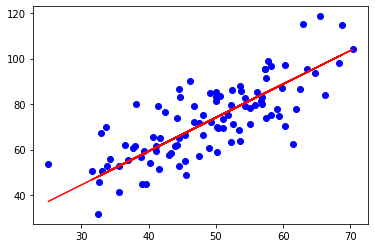

Current loss: 112.614810


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1), c='b')
plt.plot(points[:,0].reshape(-1,1), (w*points[:,0]+b).reshape(-1,1), c='r')
plt.show()

print('Current loss: %1.6f' % tf.math.reduce_mean(tf.keras.losses.MSE((w*points[:,0]+b).reshape(-1,1), outputs)).numpy())

## 方法一 keras高级API

In [16]:
import tensorflow as tf

In [17]:
points = np.genfromtxt("data.csv", delimiter=",")

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.00001),
              loss='mse',
              metrics=['mse'])

In [19]:
history=model.fit(points[:,0], points[:,1], epochs=20)

Train on 100 samples
Epoch 1/20
100/100 [==============================] - 1s 11ms/sample - loss: 14924.8233 - mse: 14924.8242
Epoch 2/20
100/100 [==============================] - 0s 150us/sample - loss: 10064.6679 - mse: 10064.6680
Epoch 3/20
100/100 [==============================] - 0s 199us/sample - loss: 6747.6957 - mse: 6747.6958
Epoch 4/20
100/100 [==============================] - 0s 150us/sample - loss: 4497.3061 - mse: 4497.3062
Epoch 5/20
100/100 [==============================] - 0s 180us/sample - loss: 3006.7463 - mse: 3006.7466
Epoch 6/20
100/100 [==============================] - 0s 199us/sample - loss: 2046.5315 - mse: 2046.5316
Epoch 7/20
100/100 [==============================] - 0s 189us/sample - loss: 1405.4423 - mse: 1405.4424
Epoch 8/20
100/100 [==============================] - 0s 229us/sample - loss: 1000.4899 - mse: 1000.4899
Epoch 9/20
100/100 [==============================] - 0s 203us/sample - loss: 726.4694 - mse: 726.4694
Epoch 10/20
100/100 [============

In [23]:
model.layers[0].weights

[<tf.Variable 'sequential/dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.4734448]], dtype=float32)>,
 <tf.Variable 'sequential/dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.05141822], dtype=float32)>]

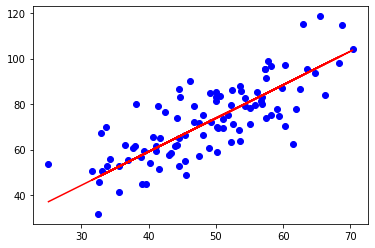

Current loss: 112.700371


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1), c='b')
plt.plot(points[:,0].reshape(-1,1), model(points[:,0].reshape(-1,1)), c='r')
plt.show()

print('Current loss: %1.6f' % tf.math.reduce_mean(tf.keras.losses.MSE(model(inputs), outputs)).numpy())

## 方法二  自己写训练过程

In [25]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))).shuffle(100).batch(1)

In [26]:
points[:,0].shape

(100,)

In [27]:
inputs=points[:,0].reshape(-1,1)
outputs=points[:,1].reshape(-1,1)

In [28]:
inputs.shape

(100, 1)

In [29]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc=tf.keras.layers.Dense(1)

    def call(self, x):
        return self.fc(x)

# Create an instance of the model
model = MyModel()

In [30]:
loss_object = tf.keras.losses.MSE

optimizer = tf.keras.optimizers.SGD(0.00001)

In [31]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [32]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = loss_object(predictions, y)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

In [34]:
EPOCHS = 50

for epoch in range(EPOCHS):
    for x, y in train_ds:
        train_step(x, y)


    template = 'Epoch {}, Loss: {}'
    print(template.format(epoch+1,
                        train_loss.result()))
    train_loss.reset_states()

Epoch 1, Loss: 116.639404296875
Epoch 2, Loss: 117.14022827148438
Epoch 3, Loss: 116.15800476074219
Epoch 4, Loss: 113.077392578125
Epoch 5, Loss: 117.87914276123047
Epoch 6, Loss: 116.74810791015625
Epoch 7, Loss: 115.95650482177734
Epoch 8, Loss: 117.0356674194336
Epoch 9, Loss: 117.20155334472656
Epoch 10, Loss: 116.263427734375
Epoch 11, Loss: 116.53357696533203
Epoch 12, Loss: 117.71051788330078
Epoch 13, Loss: 117.1958999633789
Epoch 14, Loss: 111.33833312988281
Epoch 15, Loss: 119.30535888671875
Epoch 16, Loss: 116.7109146118164
Epoch 17, Loss: 114.99636840820312
Epoch 18, Loss: 114.01504516601562
Epoch 19, Loss: 113.89630889892578
Epoch 20, Loss: 116.56376647949219
Epoch 21, Loss: 115.16777038574219
Epoch 22, Loss: 118.04524230957031
Epoch 23, Loss: 117.05481719970703
Epoch 24, Loss: 116.51722717285156
Epoch 25, Loss: 117.42916107177734
Epoch 26, Loss: 116.2668685913086
Epoch 27, Loss: 117.17070007324219
Epoch 28, Loss: 114.16722869873047
Epoch 29, Loss: 117.25157165527344
Epoc

In [35]:
model.fc.weights

[<tf.Variable 'my_model/dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.4906605]], dtype=float32)>,
 <tf.Variable 'my_model/dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.05678141], dtype=float32)>]

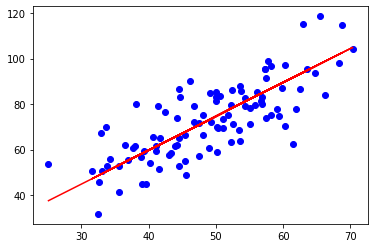

Current loss: 113.010082


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1), c='b')
plt.plot(points[:,0].reshape(-1,1), model(points[:,0].reshape(-1,1)), c='r')
plt.show()

print('Current loss: %1.6f' % tf.math.reduce_mean(loss_object(model(inputs), outputs)).numpy())